# Decision Trees and Naive bayes
We are going to add more models to the classifiers variable in the notebook:
`Exercises/E_DT_NB.ipynb`

In [4]:
# modules needed for this
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 
from matplotlib.colors import ListedColormap

#### splitting the data and then use the DT to see the tree

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Tree
here we are going to build the tree

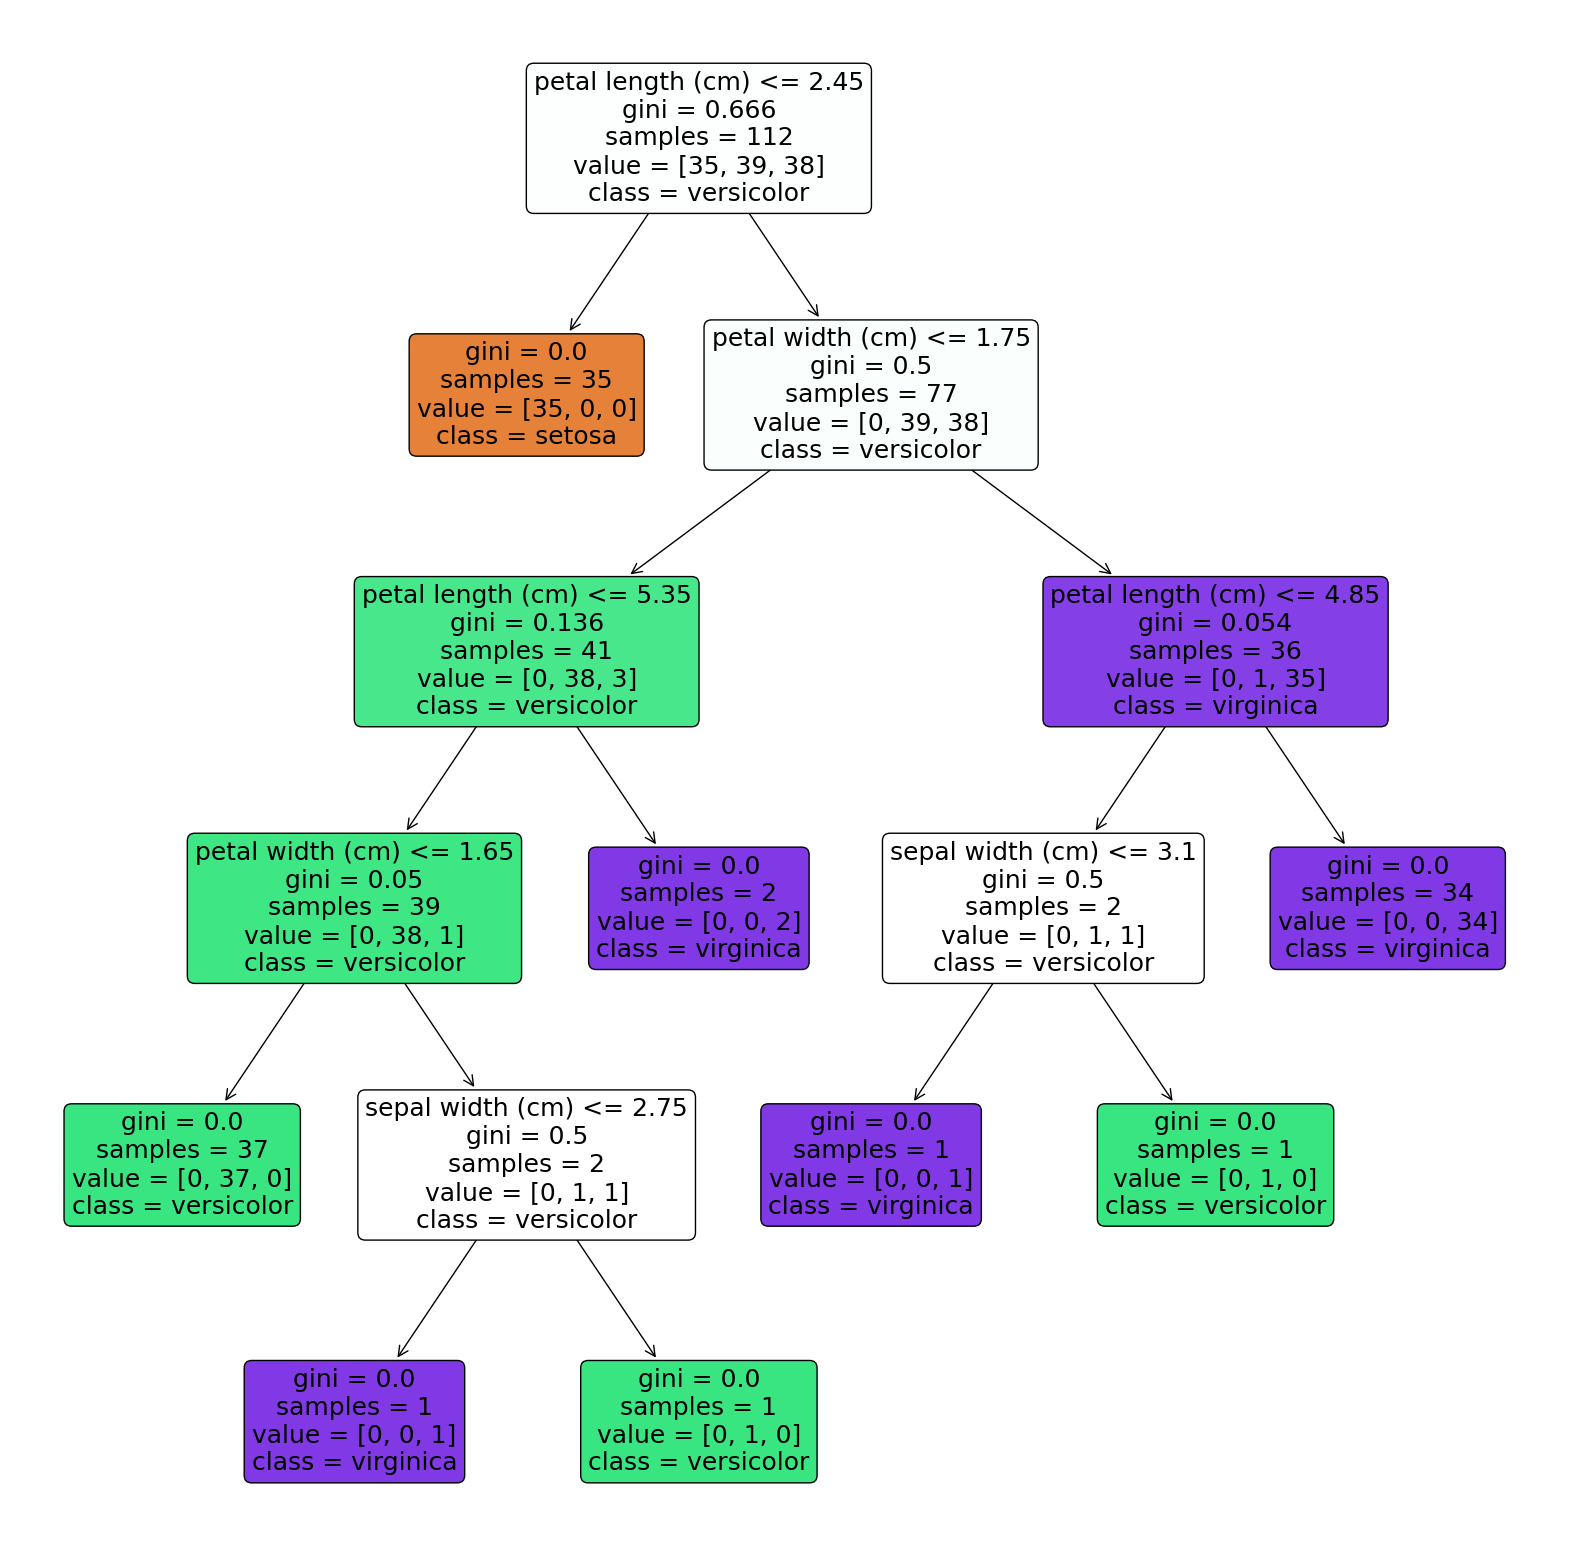

In [3]:
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

We can see from the tree and the options displayed at the top of each box that the tree can readily predict the classes in the data.

Now, let us add two more classifiers to the data. However.
The linear logistic model and the SVM_RBF model will be included.
The radial basis function is used in RBF kernels. A gamma parameter in the kernel regulates the impact of individual training data.

The logisctic regression model is simple and enjoyable to use.

In [5]:
datasets = [make_moons(), make_circles(),make_moons(),make_circles()]
names = ['Decision Tree', 'Naive Bayes','svm','LogisticRegression']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB(), svm.SVC(kernel='rbf', gamma=0.7),LogisticRegression()]

# plotting
Code from notebook `Exercises/E_DT_NB.ipynb`

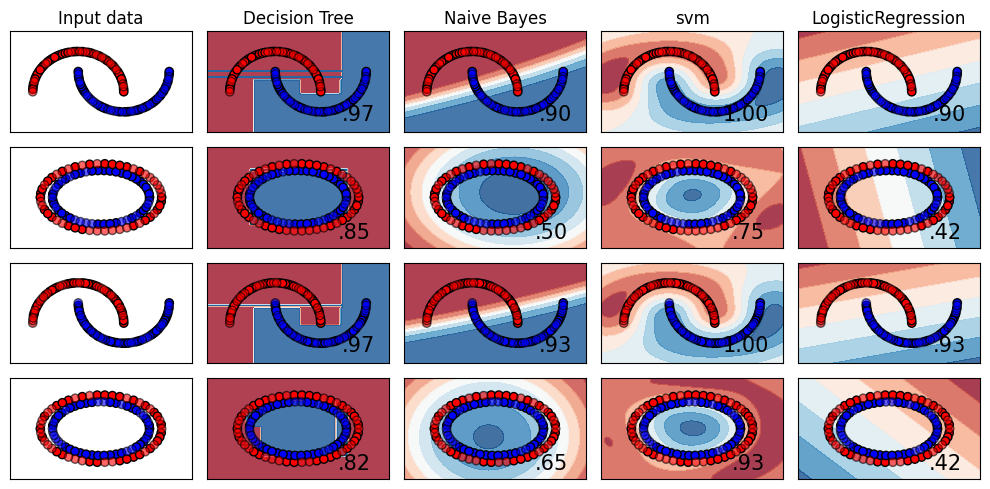

In [6]:
figure = plt.figure(figsize=(10, 5))
i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()

# Conclusion

As we can see, the methods used to anticipate the lunar data differ. The naive bayes is the worst of them all, which is understandable given that this is random data with a label. As a result, utilizing naive bayes is not the best solution. The logistic regression approach is likewise overly simplistic and unsuitable for this type of data. 
The Decicion tree and SVM are both quite effective. A higher degree could be used to improve the SVM model.

